# Last Name, First Name - Homework 2

We numerically explore the relationship between error distributions, objective functions (least squares versus least absolute deviation, and computational speed.

The following simulation creates a data set according to
$$y_i = \beta_1 + \beta_2 x_i + \beta_3 x_i^2 + \epsilon_i.$$

We generate $n$ observations from this model for $x$ on an equally spaced grid $[0,1]$. For $Yt$, the errors ($\epsilon_i$) have a t-distribution with 2 degrees of freedom. For $Yn$, the errors have a standard normal distribution. We plot each of these data sets and the true regression function.

In [15]:
set.seed(1234)
n <- 500
x <- seq(from=0,to=1,length.out=n)
X <- cbind(1,x,x^2)
beta <- matrix(c(1,2,4),nrow=3)
Yt <- X%*%beta + rt(n,df=2)
Yn <- X%*%beta + rnorm(n)

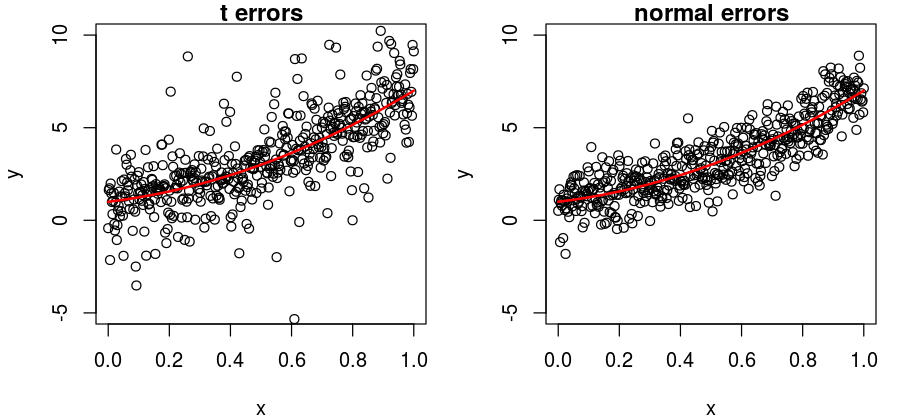

In [2]:
options(repr.plot.width=7.5,repr.plot.height=3.5)
par(mar=c(4,4,1,1),mfcol=c(1,2))
ylim <- c(-5,10)
plot(X[,2],Yt,xlab="x",ylab="y",main="t errors",ylim=ylim)
points(X[,2],X%*%beta,type='l',col='red',lwd=2)
plot(X[,2],Yn,xlab="x",ylab="y",main="normal errors",ylim=ylim)
points(X[,2],X%*%beta,type='l',col='red',lwd=2)

The t distribution produces a lot of outliers (some outliers are not shown because we restricted the y-axis to ylim in each plot). Given the data, out goal is to infer the parameters $\beta$. We will consider two methods. The least squares method we discussed in class is
$$ \beta_{LS} = \text{argmin}_{\beta} (y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2)^2 =  \text{argmin}_{\beta} (Y - X\beta)^T(Y - X\beta) = (X^TX)^{-1}X^TY$$
A second possibility is to find the [least absolute deviations](https://en.wikipedia.org/wiki/Least_absolute_deviations) estimator. We call this $\beta_{LAD}$ which has the form
$$\beta_{LAD} = \text{argmin}_{\beta} |y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2|.$$
This may also be known as $L_1$ regression or quantile regression with the $0.5$ quantile.

In this homework you will fit both $\beta_{LS}$ and $\beta_{LAD}$ and compare the methods based on parameter estimation accuracy and speed.

## Question 1

Fixing $X$, generate the $Yt$ and $Yn$ data $N=100$ times (note that $n$ is the sample size and $N$ is the number of times we run the simulation). Compute $\beta_{LS}$ and $\beta_{LAD}$ each time. Since $\beta$ is a vector of length $3$, this will result in 4 matrices (LS for $Yt$ and $Yn$ and LAD for $Yt$ and $Yn$) with $N$ rows and 3 columns (you could store this output in other formats as well, but matrices are convenient).

Make scatterplots of $\beta_2$ versus $\beta_3$ estimates for each type of data, estimator. This will produce four scatterplots. Mark the true $\beta_2$ and $\beta_3$ on each plot and comment of the quality of the estimators in the different settings. You scatterplot should look similar to the ones below.

**Tips for Fitting** For fitting $\beta_{LS}$, you have many options in R (lm, lm.fit) and python (scipy.linalg.lstsq, sklearn.linear_model.LinearRegression). For fitting $\beta_{LAD}$ in R you can use l1fit from the package L1pack or  rq.fit from quantreg. For fitting $\beta_{LAD}$ in python the options are somewhat more limited:
* [statsmodels](http://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html) requires use of pandas, calls the quantreg R package
* generic optimizer such as [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)

The later is a more general method that will likely be slower. But scipy.optimize is general and will be useful for many other problems. You may also use any other optimizer you find. 

(requires internet connection to view)

<img src="https://longjp.github.io/statcomp/hw/betaT.png">

(requires internet connection to view)

<img src="https://longjp.github.io/statcomp/hw/betaNorm.png">

## Question 2

Compare the speed of $\beta_{LS}$ to $\beta_{LAD}$ using a package such as benchmark in R or some of the tools [here](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) in python. Empirically determine the computational complexity (in $n$) of $\beta_{LAD}$ and $\beta_{LS}$ (we know from theoretical analysis that $\widehat{\beta}_{LS}$ should be linear in $n$).